<a href="https://colab.research.google.com/github/AdityaMohite47/pytorch-deep-learning/blob/main/Computer_Vision_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Inputs & Outputs to Computer Vision Model**


[Tensor of Image properties (color channels , width & height) ] ---> [ Probability Scores for Respective Classes ]


**Libraries of PyTorch for Vision**

import torchvision

import torchvision.datasets - get datasets and data loading functions

import torchvision.models - pre-built models

import torchvision.transforms - image manipulation

**Getting Dataset**
FashionMNIST from torchvision.datasets

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [3]:
train_data = datasets.FashionMNIST(
    root="data", # location of where the data should be downloaded
    train=True, # bool value for 'traning-version of dataset'
    download=True, # bool value for 'do we want to download or load'
    transform=ToTensor(), # transforming image data to tensor
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 213kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.55MB/s]


In [4]:
len(train_data) , len(test_data)

(60000, 10000)

In [5]:
image , data = train_data[0]

In [6]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [7]:
data

9

In [8]:
train_data.classes # target classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
image.shape , data

(torch.Size([1, 28, 28]), 9)

**Visualizing Images**

Text(0.5, 1.0, '9')

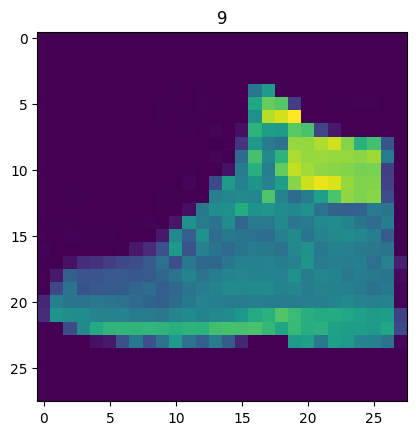

In [11]:
import matplotlib.pyplot as plt
image , label = train_data[90]
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

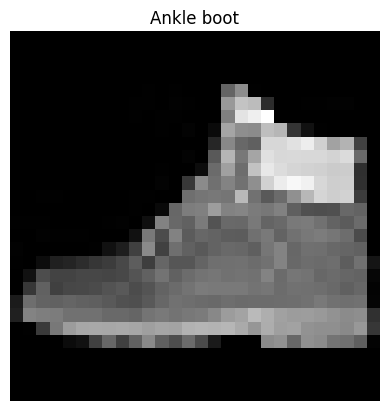

In [12]:
plt.imshow(image.squeeze() , cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)

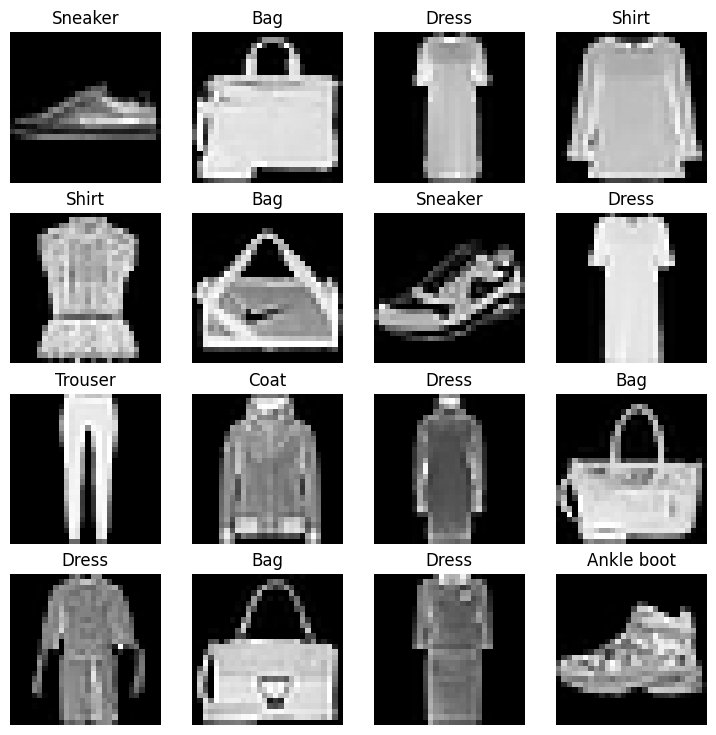

In [13]:
# torch.manual_seed(73)
fig = plt.figure(figsize=(9 , 9))
rows , cols = 4 , 4

for i in range(1 , rows*cols+1):
  idx = torch.randint(0 , len(train_data) , size=[1]).item()
  img , lbl = train_data[idx]
  fig.add_subplot(rows , cols , i)
  plt.imshow(img.squeeze() , cmap='gray')
  plt.title(train_data.classes[lbl])
  plt.axis(False)

**Preparing the Data Loader**

DataLoader turns our dataset (of Pytorch format) into Python iterable.

Specifically, turning our data into batches/mini-batches to stay computationally efficient with hardware memory and give our network more chances to update its gradients per training epoch.

In [24]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [25]:
print(f"Length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader : 1875 batches of 32


In [26]:
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of test_dataloader : 313 batches of 32


In [27]:
# Inside of train_dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

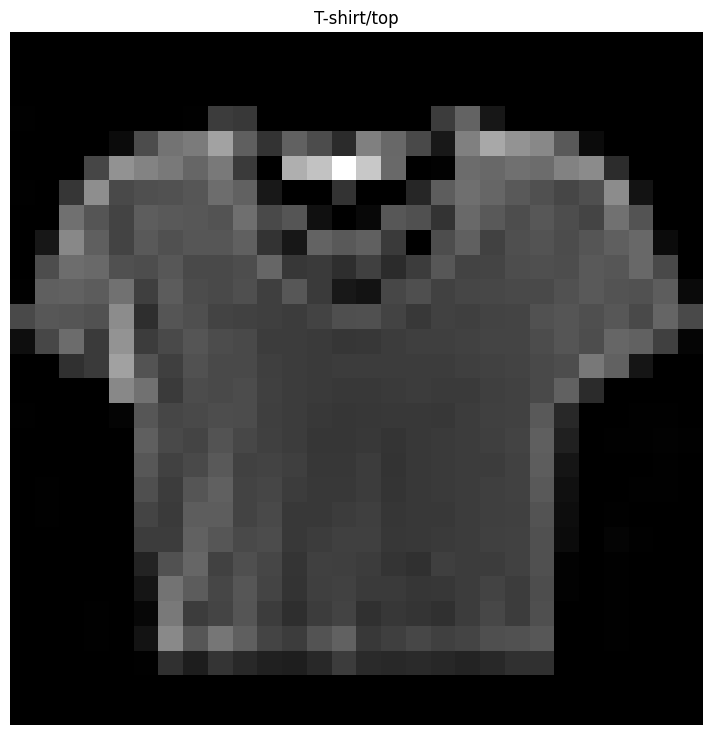

In [30]:
# Random sample of inside a batch of data
fig = plt.figure(figsize=(9 , 9))
rows , cols = 4 , 4

for i in range(1 , rows*cols+1):
  idx = torch.randint(0 , len(train_features_batch) , size=[1]).item()
  img , lbl = train_features_batch[idx] , train_labels_batch[idx]
  plt.imshow(img.squeeze() , cmap='gray')
  plt.title(train_data.classes[lbl])
  plt.axis(False)